In [1]:
from drn_interactions.load import load_spikes, load_neurons
from drn_interactions.transforms import bin_spikes
from spiketimes.binning import binned_spiketrain_bins_provided
from binit import which_bin
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import variation
from statsmodels.tsa.stattools import acf, pacf
from drn_interactions.cross_correlations import ccf

In [2]:
def population_volitility(df_spikes, bin_width, cv_thresh=1):
    # get population spiketrain

    # bin at interval

    # calculate CV of MFR
    ...

df_spikes = load_spikes("pre")


In [68]:
class PopulationCoupling:
    def __init__(self, df, difference_neuron=False, difference_pop_pre=False, difference_pop_post=False):
        self.df = df
        self.time_interval = np.diff(df.index.values)[0]
        self._coupling = None
        self.difference_neuron = difference_neuron
        self.difference_pop_post = difference_pop_post
        self.difference_pop_pre = difference_pop_pre


    def _pop_cup(self, df):
        frames = []
        for neuron_id in df.columns:
            population_spikes = df.copy()
            neuron_spikes = population_spikes.pop(neuron_id)
            if self.difference_neuron:
                neuron_spikes = neuron_spikes.diff().dropna()
            
            if self.difference_pop_pre:
                population_spikes = population_spikes.diff().dropna()
            
            population_spikes = population_spikes.sum(axis=1)
            if self.difference_pop_post:
                population_spikes = population_spikes.diff().dropna()


            lags, vals =  ccf(neuron_spikes, population_spikes, adjusted=False)
            time = lags * self.time_interval
            frames.append(pd.DataFrame({"neuron_id": neuron_id, "lag": lags, "time": time, "cc": vals}))
        return pd.concat(frames)
    
    @property
    def coupling(self):
        if self._coupling is None:   
            self._coupling = self._pop_cup(self.df)
        return self._coupling
    
    @property
    def coupling_piv_lag(self):
        return self.coupling.pivot(index="lag", columns="neuron_id", values="cc").copy()

    @property
    def coupling_piv_time(self):
        return self.coupling.pivot(index="time", columns="neuron_id", values="cc").copy()


In [84]:
neurons = load_neurons()
session = neurons.session_name.unique()[1]
neurons_sub = neurons.loc[lambda x: x.session_name == session]["neuron_id"].unique()
spikes_sub = df_spikes.loc[lambda x: x.neuron_id.isin(neurons_sub)]

In [85]:
df_counts = bin_spikes(spikes_sub, bin_width=0.05, t_before=0, t_max=1800).pivot(index="bin", columns="neuron_id", values="counts")

mod = PopulationCoupling(df_counts, difference_neuron=True, difference_pop_pre=True)
res = mod.coupling_piv_time

c:\users\roryl\repos\drn interactions\drn_interactions\cross_correlations.py:25: RuntimeWarning: invalid value encountered in true_divide
  return lags, cvf / (np.std(x) * np.std(y))
c:\users\roryl\repos\drn interactions\drn_interactions\cross_correlations.py:25: RuntimeWarning: invalid value encountered in true_divide
  return lags, cvf / (np.std(x) * np.std(y))
c:\users\roryl\repos\drn interactions\drn_interactions\cross_correlations.py:25: RuntimeWarning: invalid value encountered in true_divide
  return lags, cvf / (np.std(x) * np.std(y))
c:\users\roryl\repos\drn interactions\drn_interactions\cross_correlations.py:25: RuntimeWarning: invalid value encountered in true_divide
  return lags, cvf / (np.std(x) * np.std(y))
c:\Users\roryl\.conda\envs\drn-interactions\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

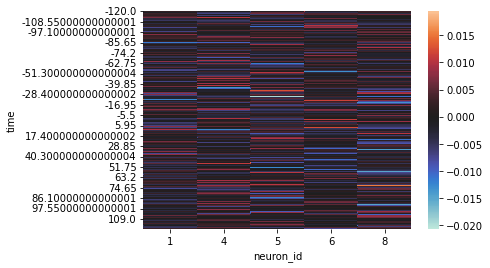

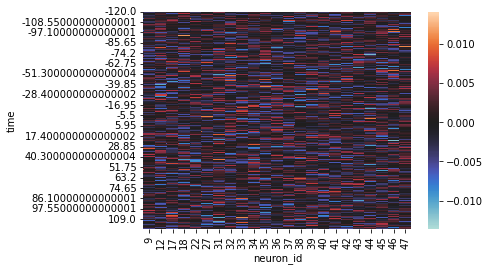

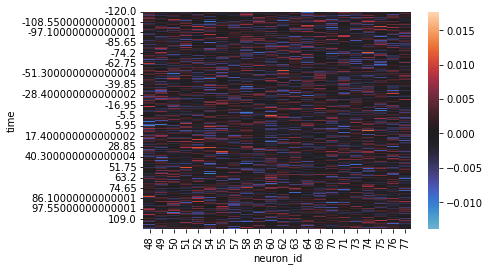

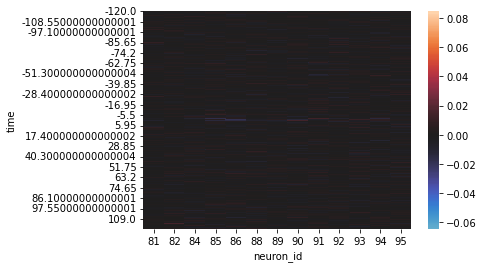

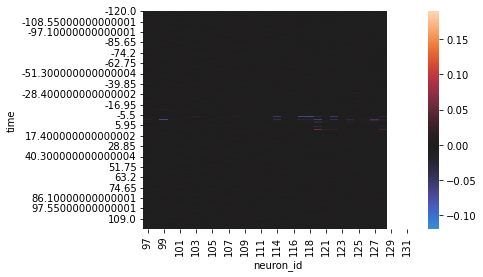

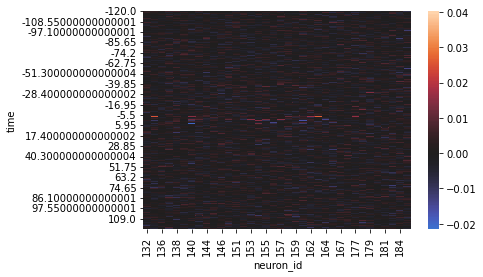

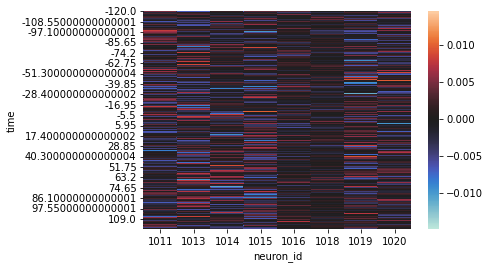

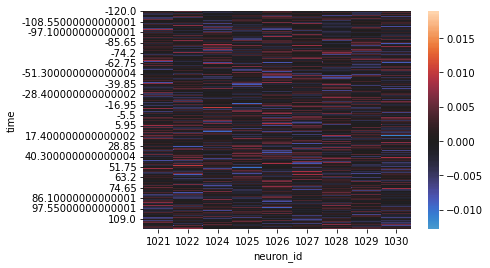

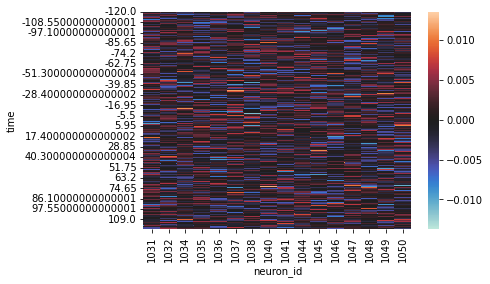

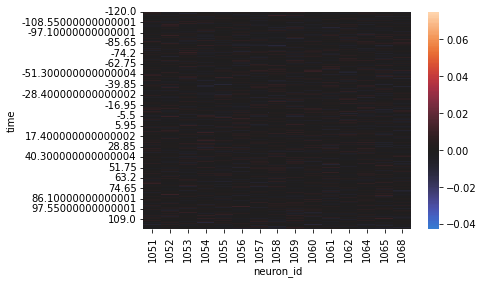

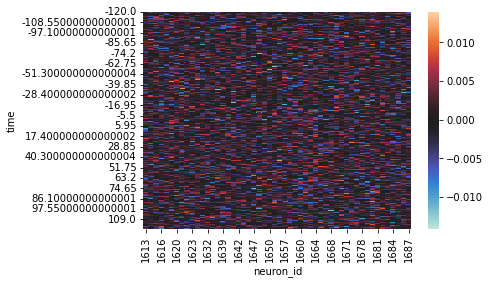

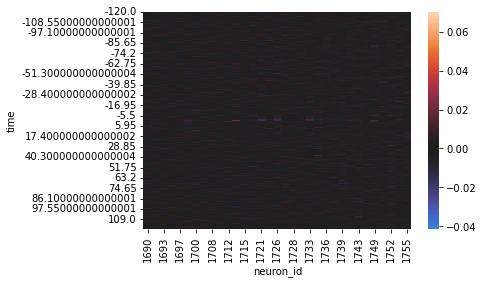

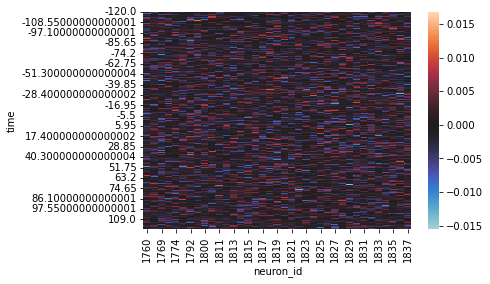

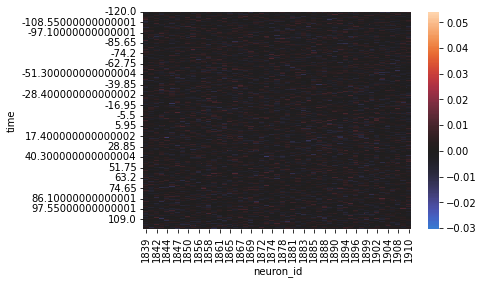

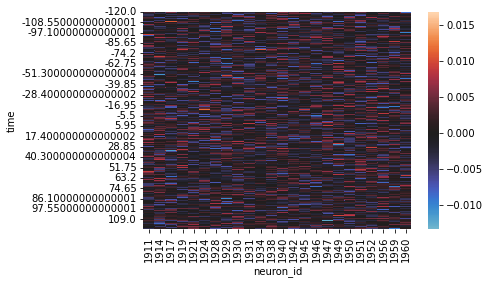

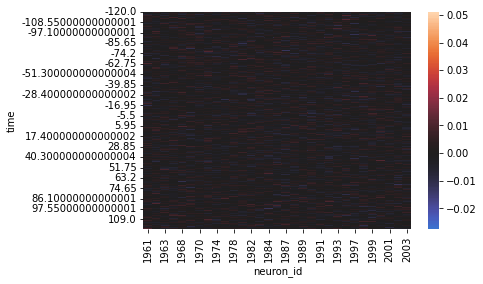

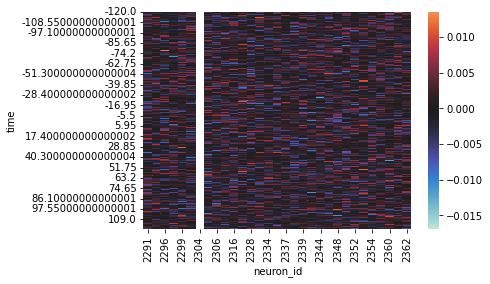

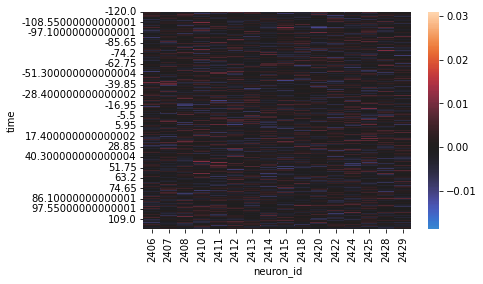

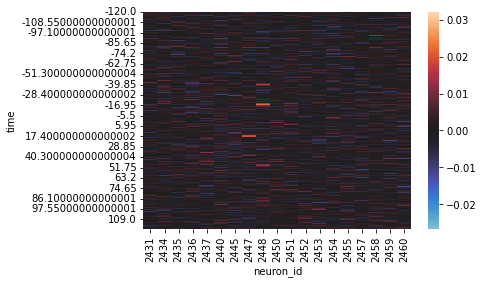

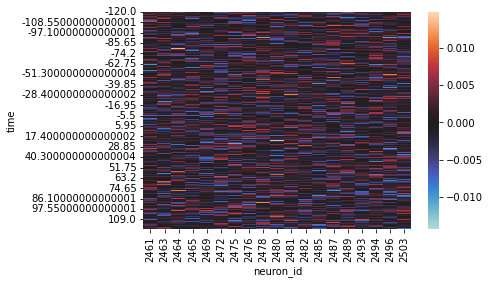

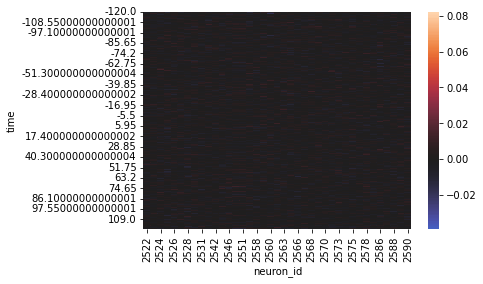

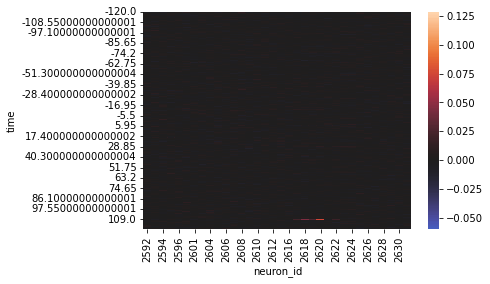

In [89]:
neurons = load_neurons()
for session in neurons.session_name.unique():
    neurons_sub = neurons.loc[lambda x: x.session_name == session]["neuron_id"].unique()
    spikes_sub = df_spikes.loc[lambda x: x.neuron_id.isin(neurons_sub)]
    df_counts = bin_spikes(spikes_sub, bin_width=0.05, t_before=0, t_max=1800).pivot(index="bin", columns="neuron_id", values="counts")
    mod = PopulationCoupling(df_counts, difference_neuron=True, difference_pop_pre=True)
    res = mod.coupling_piv_time
    plt.figure()
    sns.heatmap(res[(res.index >= -120) & (res.index <= 120)], center=0, linecolor="none")

c:\users\roryl\repos\drn interactions\drn_interactions\cross_correlations.py:25: RuntimeWarning: invalid value encountered in true_divide
  return lags, cvf / (np.std(x) * np.std(y))
c:\users\roryl\repos\drn interactions\drn_interactions\cross_correlations.py:25: RuntimeWarning: invalid value encountered in true_divide
  return lags, cvf / (np.std(x) * np.std(y))
c:\Users\roryl\.conda\envs\drn-interactions\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


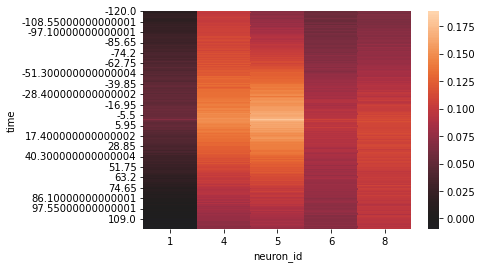

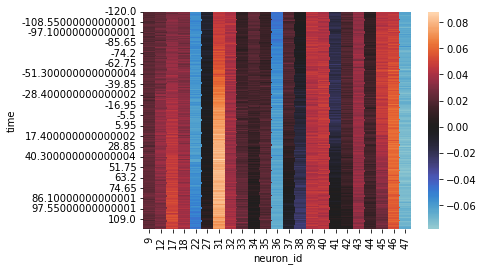

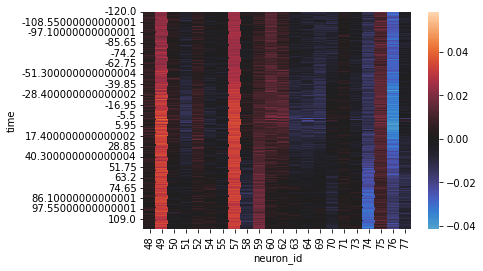

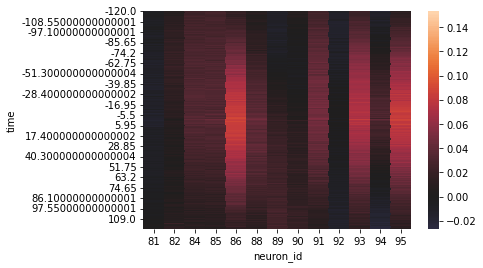

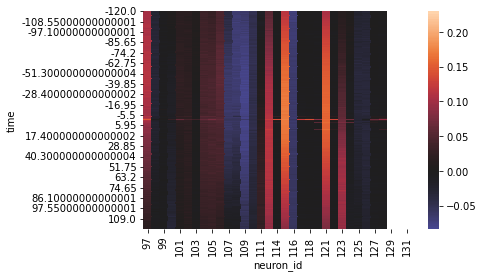

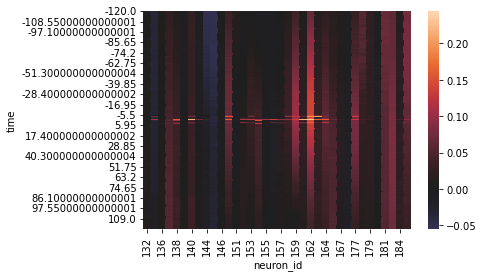

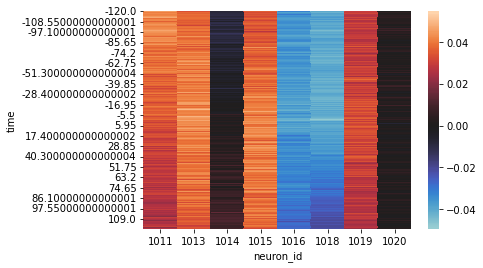

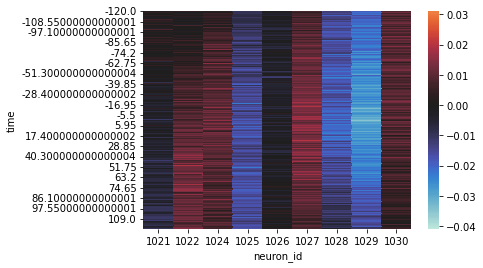

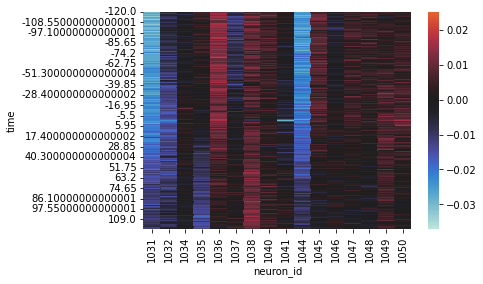

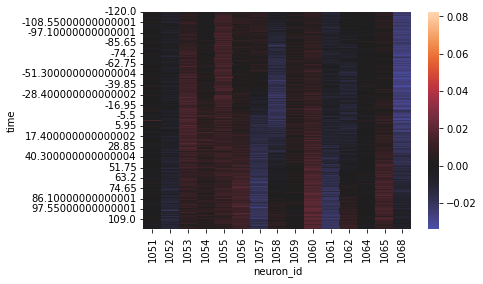

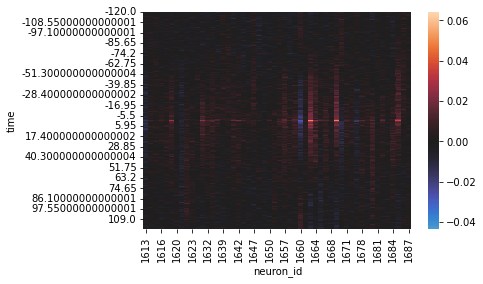

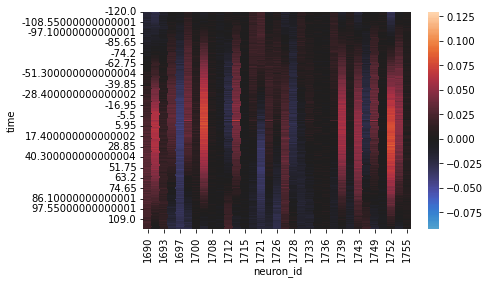

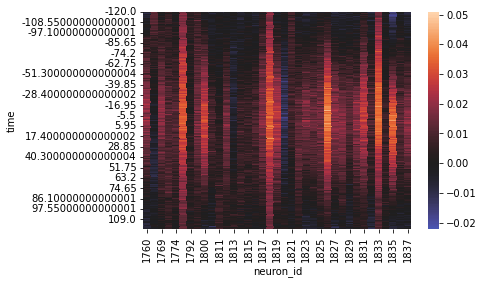

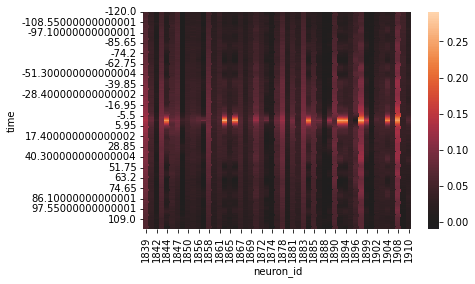

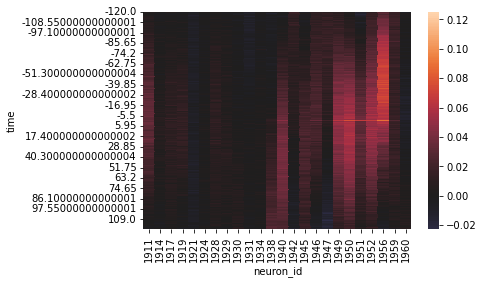

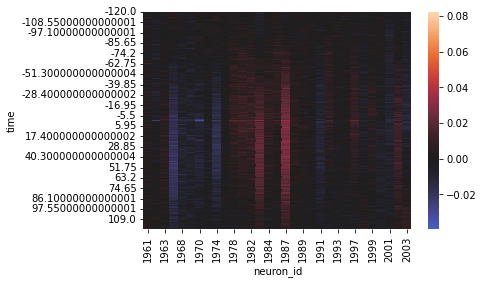

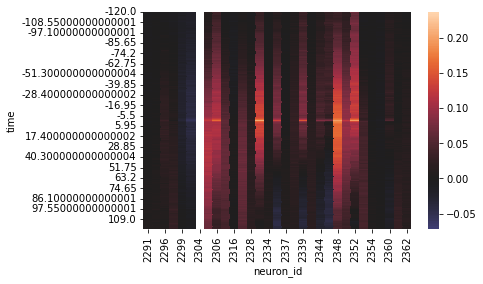

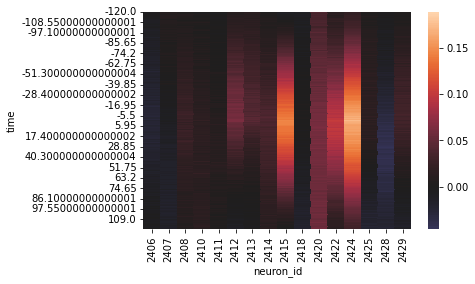

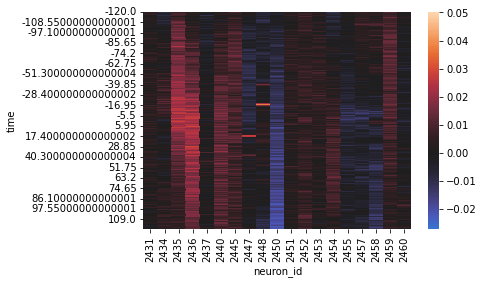

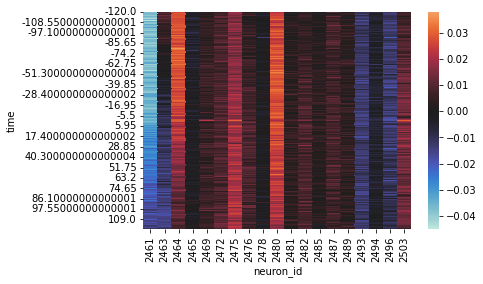

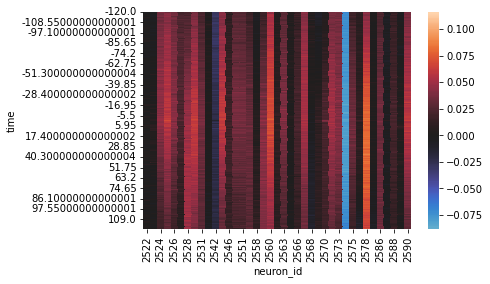

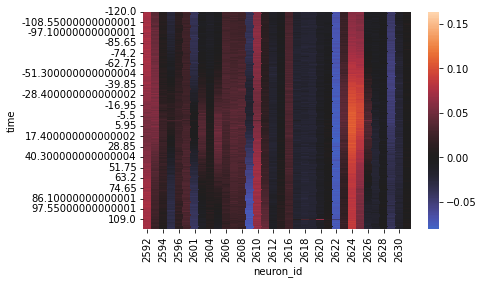

In [93]:
neurons = load_neurons()
for session in neurons.session_name.unique():
    neurons_sub = neurons.loc[lambda x: x.session_name == session]["neuron_id"].unique()
    spikes_sub = df_spikes.loc[lambda x: x.neuron_id.isin(neurons_sub)]
    df_counts = bin_spikes(spikes_sub, bin_width=0.05, t_before=0, t_max=1800).pivot(index="bin", columns="neuron_id", values="counts")
    mod = PopulationCoupling(df_counts, difference_neuron=False, difference_pop_pre=False)
    res = mod.coupling_piv_time
    plt.figure()
    sns.heatmap(res[(res.index >= -120) & (res.index <= 120)], center=0, linecolor="none")

<AxesSubplot:xlabel='time'>

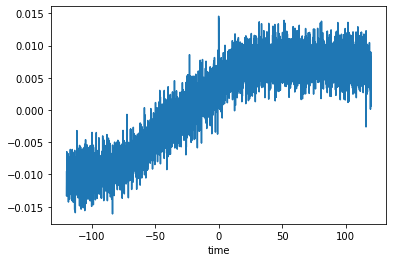

In [109]:
res.loc[(res.index >= -120) & (res.index <= 120)].iloc[:, 8].plot()

In [45]:

def cross_corr(x, y,):
    values = ccf(x, y, adjusted=False)
    lags = np.arange(nlags + 1)
    return pd.DataFrame(dict(acf=values, lag=lags))

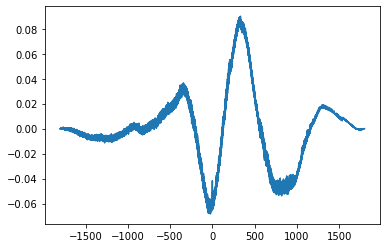

In [48]:
lags, res = ccf(x, y, adjusted=False)
lags = lags * 0.05
plt.plot(lags, res)

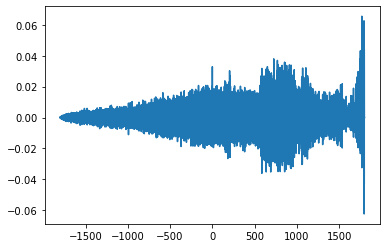

In [47]:
lags, res = ccf(x.diff().fillna(0), y.diff().fillna(0))
lags = lags * 0.05
plt.plot(lags, res)

In [203]:
t_start = 0
t_stop= 1800
bin_width = 0.05
segment_length = 10

bins = np.arange(t_start, t_stop, bin_width)
segments = np.arange(t_start, t_stop, segment_length)

In [204]:
spike_counts = binned_spiketrain_bins_provided(spikes_sub["spiketimes"].values, bins)
bin_idx = np.arange(len(spike_counts))
segment_start = which_bin(bins[:-1], segments, time_before=0, time_after=segment_length)

In [205]:
df = pd.DataFrame({"time": bins[:-1], "counts": spike_counts, "segment": segment_start})

<AxesSubplot:xlabel='time'>

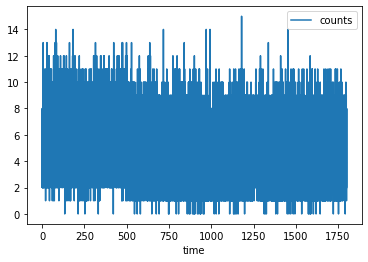

In [206]:
df.plot(x="time", y="counts")

<AxesSubplot:xlabel='segment'>

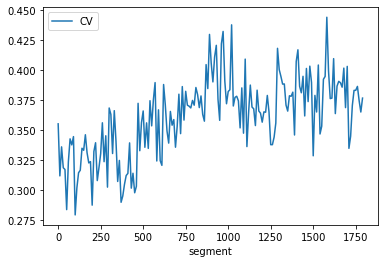

In [207]:
df.groupby("segment")["counts"].apply(variation).to_frame(name="CV").plot()

array([   0.,    0.,    0., ..., 1790., 1790., 1790.])